# Movie 

## Exploratory Data Analysis


Data Source :http://ai.stanford.edu/~amaas/data/sentiment/


In [1]:
#Load the training data
import os
path="F:\\Projects\\MovieNLP\\aclImdb\\train"


#PositiveReviews
pos_rev_list=[]
for file in os.listdir(os.path.join(path,"pos")):
    pos_rev_list.append(file)

pos_rev=[]
                       
                       
for f in pos_rev_list: 
    file=path+'\\pos\\'+f
    file_text=open(file,'r',encoding="utf8").read()
    rating=f.split('.')[0].split('_')[1]
    pos_rev.append((file_text,rating)) 
                       
#Negative Reviews           
neg_rev_list=[]
for file in os.listdir(os.path.join(path,"neg")):
     neg_rev_list.append(file)
                       
neg_rev=[]
                       
                       
for f in neg_rev_list: 
    file=path+'\\neg\\'+f
    file_text=open(file,'r',encoding='utf8').read()
    rating=f.split('.')[0].split('_')[1]
    neg_rev.append((file_text,rating))

## Preliminary Visualisations

Let us look at the data without cleaning or modifying it.

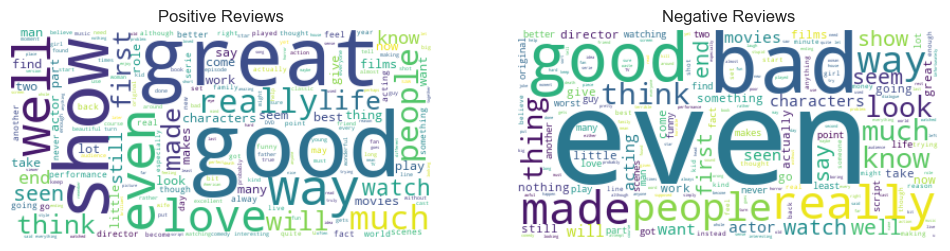

In [71]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

all_text_pos = " ".join(review for review,rating in pos_rev)
all_text_neg=" ".join(review for review,rating in neg_rev)


stopwords = set(STOPWORDS)
stopwords.update(['movie','film','plot','character','br','make','story','one','time','scene','see'])
wordcloud_p = WordCloud(stopwords=stopwords,background_color='white').generate(all_text_pos)
wordcloud_n = WordCloud(stopwords=stopwords,background_color='white').generate(all_text_neg)
# Display the generated image:

fig, axs = plt.subplots(ncols=2,figsize=(12, 8))
axs[0].imshow(wordcloud_p, interpolation='bilinear')
axs[1].imshow(wordcloud_n, interpolation='bilinear')
axs[0].axis("off")
axs[1].axis('off')
axs[1].set(title="Negative Reviews")
axs[0].set(title="Positive Reviews")
plt.show()


<ul>
<li>The number of characters in reviews of various ratings.</li>
<li>The histogram of the number of characters in a review.</li>
</ul>

[(0.0, 10000.0)]

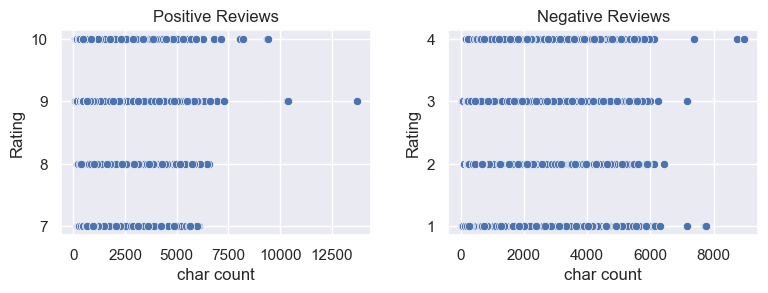

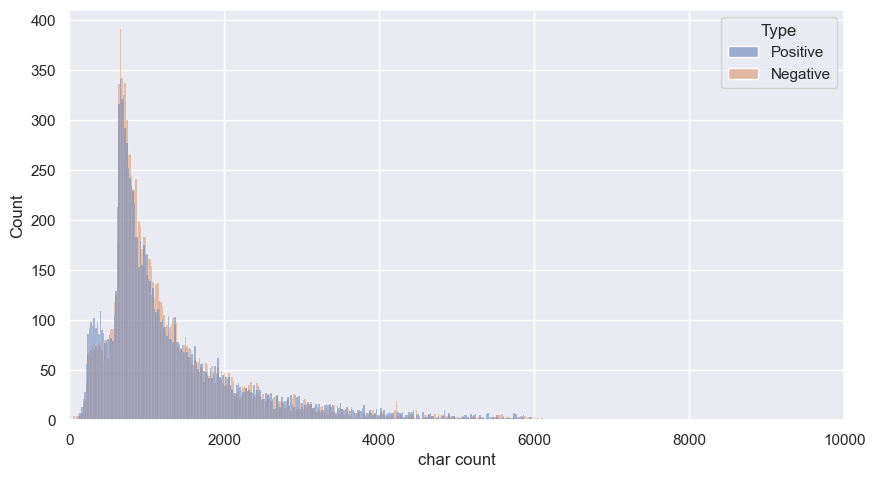

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

sns.set_theme()

charcount_pos=[len(i[0]) for i in pos_rev]
rating_pos=[int(i[1]) for i in pos_rev]
charcount_neg=[len(i[0]) for i in neg_rev]
rating_neg=[int(i[1]) for i in neg_rev]

charcount_data=pd.concat([
pd.DataFrame.from_dict({"char count":charcount_pos,"Rating":rating_pos,"Type":"Positive"}),
pd.DataFrame.from_dict({"char count":charcount_neg,"Rating":rating_neg,"Type":"Negative"})])

fig = plt.figure(figsize=(9, 6))

plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

sub1 = fig.add_subplot(2,2,1) 
sns.scatterplot(data=charcount_data[charcount_data["Type"]=="Positive"],x="char count",y="Rating").set(title="Positive Reviews")

sub2 = fig.add_subplot(2,2,2)
sns.scatterplot(data=charcount_data[charcount_data["Type"]=="Negative"],x="char count",y="Rating").set(title="Negative Reviews")

fig2=plt.figure(figsize=(10,12))
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
sub3 = fig2.add_subplot(2,2,(3,4)) # two rows, two colums, combined third and fourth cell
sns.histplot(charcount_data,x="char count",hue="Type", alpha=0.5,binwidth=20).set(xlim=(0,10000))
#sns.histplot(plot_data,x="Negative Reviews")

#charcount_data

#charcount_data

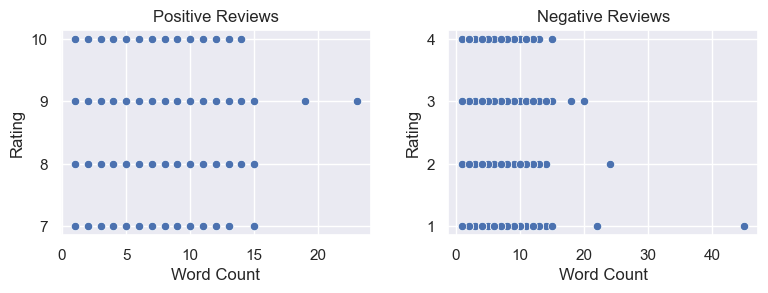

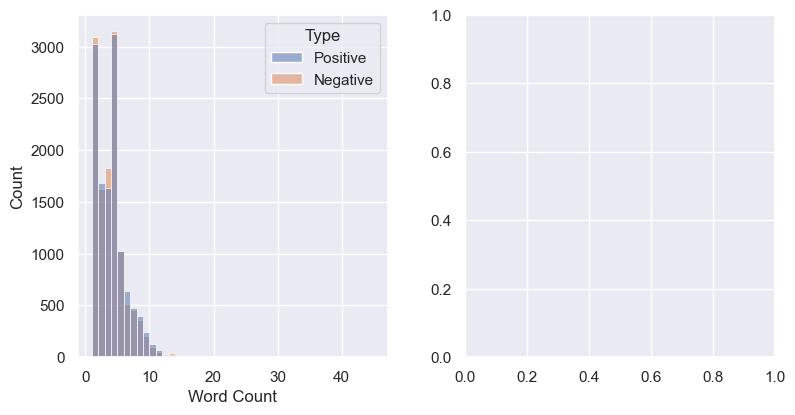

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize,sent_tokenize
#import nltk
#nltk.download('punkt')

sns.set_theme()
word_tokenize(pos_rev[0][0])
word_pos=[word_tokenize(i[0]) for i in pos_rev]
wordlength_pos=[float(sum([len(i[0]) for i in words])) for words in word_pos]
wordcount_pos=[len(i[0]) for i in word_pos]
rating_pos=[int(i[1]) for i in pos_rev]



word_neg=[word_tokenize(i[0]) for i in neg_rev]
wordlength_neg=[float(sum([len(i[0]) for i in words])) for words in word_neg]
wordcount_neg=[len(i[0]) for i in word_neg]
rating_neg=[int(i[1]) for i in neg_rev]

wordcount_data=pd.concat([
pd.DataFrame.from_dict({"Word Count":wordcount_pos,"Rating":rating_pos,"Type":"Positive"}),
pd.DataFrame.from_dict({"Word Count":wordcount_neg,"Rating":rating_neg,"Type":"Negative"})])

fig = plt.figure(figsize=(9, 6))

plt.subplots_adjust(wspace= 0.25, hspace= 0.25)

sub1 = fig.add_subplot(2,2,1) 
sns.scatterplot(data=wordcount_data[wordcount_data["Type"]=="Positive"],x="Word Count",y="Rating").set(title="Positive Reviews")

sub2 = fig.add_subplot(2,2,2)
sns.scatterplot(data=wordcount_data[wordcount_data["Type"]=="Negative"],x="Word Count",y="Rating").set(title="Negative Reviews")

fig2=plt.figure(figsize=(9,10))
plt.subplots_adjust(wspace= 0.25, hspace= 0.25)
sub3 = fig2.add_subplot(2,2,1) 
sns.histplot(wordcount_data,x="Word Count",hue="Type", alpha=0.5,binwidth=1)

sub4=fig2.add_subplot(2,2,2)
#sns.histplot(wordcount_data)



Negative Reviews have some outliers with some reviews having significantly more words than the rest. 

<ul>
<li>The number of words in reviews of various ratings.</li>
<li>The histogram of the number of words in a review.</li>
</ul>

In [ ]:
sns.set_theme()
fig, axs = plt.subplots(ncols=2,figsize=(10, 2))






## Data Cleaning 




In [ ]:
word_contractions = { 
"ain't": "am not" ,"are not","is not", "has not","have not",
"aren't": "are not","am not",
"can't": "cannot",
"can't've": "cannot have",
"'cause": "because",
"could've": "could have",
"couldn't": "could not",
"couldn't've": "could not have",
"didn't": "did not",
"doesn't": "does not",
"don't": "do not",
"hadn't": "had not",
"hadn't've": "had not have",
"hasn't": "has not",
"haven't": "have not",
"he'd": "he had","he would",
"he'd've": "he would have",
"he'll": "he shall" "he will",
"he'll've": "he shall have","he will have",
"he's": "he has", "he is",
"how'd": "how did",
"how'd'y": "how do you",
"how'll": "how will",
"how's": "how has" ,"how is", "how does",
"I'd": "I had","I would",
"I'd've": "I would have",
"I'll": "I shall","I will",
"I'll've": "I shall have" ,"I will have",
"I'm": "I am",
"I've": "I have",
"isn't": "is not",
"it'd": "it had","it would",
"it'd've": "it would have",
"it'll": "it shall",  "it will",
"it'll've": "it shall have", "it will have",
"it's": "it has", "it is",
"let's": "let us",
"ma'am": "madam",
"mayn't": "may not",
"might've": "might have",
"mightn't": "might not",
"mightn't've": "might not have",
"must've": "must have",
"mustn't": "must not",
"mustn't've": "must not have",
"needn't": "need not",
"needn't've": "need not have",
"o'clock": "of the clock",
"oughtn't": "ought not",
"oughtn't've": "ought not have",
"shan't": "shall not",
"sha'n't": "shall not",
"shan't've": "shall not have",
"she'd": "she had","she would",
"she'd've": "she would have",
"she'll": "she shall","she will",
"she'll've": "she shall have / she will have",
"she's": "she has", "she is",
"should've": "should have",
"shouldn't": "should not",
"shouldn't've": "should not have",
"so've": "so have",
"so's": "so as", "so is",
"that'd": "that would", "that had",
"that'd've": "that would have",
"that's": "that has","that is",
"there'd": "there had", "there would",
"there'd've": "there would have",
"there's": "there has", "there is",
"they'd": "they had", "they would",
"they'd've": "they would have",
"they'll": "they shall", "they will",
"they'll've": "they shall have", "they will have",
"they're": "they are",
"they've": "they have",
"to've": "to have",
"wasn't": "was not",
"we'd": "we had", "we would",
"we'd've": "we would have",
"we'll": "we will",
"we'll've": "we will have",
"we're": "we are",
"we've": "we have",
"weren't": "were not",
"what'll": "what shall", "what will",
"what'll've": "what shall have", "what will have",
"what're": "what are",
"what's": "what has", "what is",
"what've": "what have",
"when's": "when has", "when is",
"when've": "when have",
"where'd": "where did",
"where's": "where has", "where is",
"where've": "where have",
"who'll": "who shall","who will",
"who'll've": "who shall have", "who will have",
"who's": "who has", "who is",
"who've": "who have",
"why's": "why has", "why is",
"why've": "why have",
"will've": "will have",
"won't": "will not",
"won't've": "will not have",
"would've": "would have",
"wouldn't": "would not",
"wouldn't've": "would not have",
"y'all": "you all",
"y'all'd": "you all would",
"y'all'd've": "you all would have",
"y'all're": "you all are",
"y'all've": "you all have",
"you'd": "you had", "you would",
"you'd've": "you would have",
"you'll": "you shall", "you will",
"you'll've": "you shall have", "you will have",
"you're": "you are",
"you've": "you have"
}

from nltk.corpus import stopwords
import re, string

def clean_text(text):
    text=text.lower() #convert all characters to lowercase
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    
    text=emoji_pattern.sub(r'', text)
    text = re.sub(r"(@\[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\w+:\/\/\S+)|^rt|http.+?", "", text) #remove punctuations, urls and @
    html_tags=re.compile('<.*?>|&([a-z0-9]+|#[0-9]{1,6}|#x[0-9a-f]{1,6});')
    text=html_tags.sub(r'',text) #remove html tags
    text = ' '.join([word_contractions[t] if t in word_contractions else t for t in text.split(" ")])
    
    
    return text
    

AttributeError: 'numpy.ndarray' object has no attribute 'yaxis'

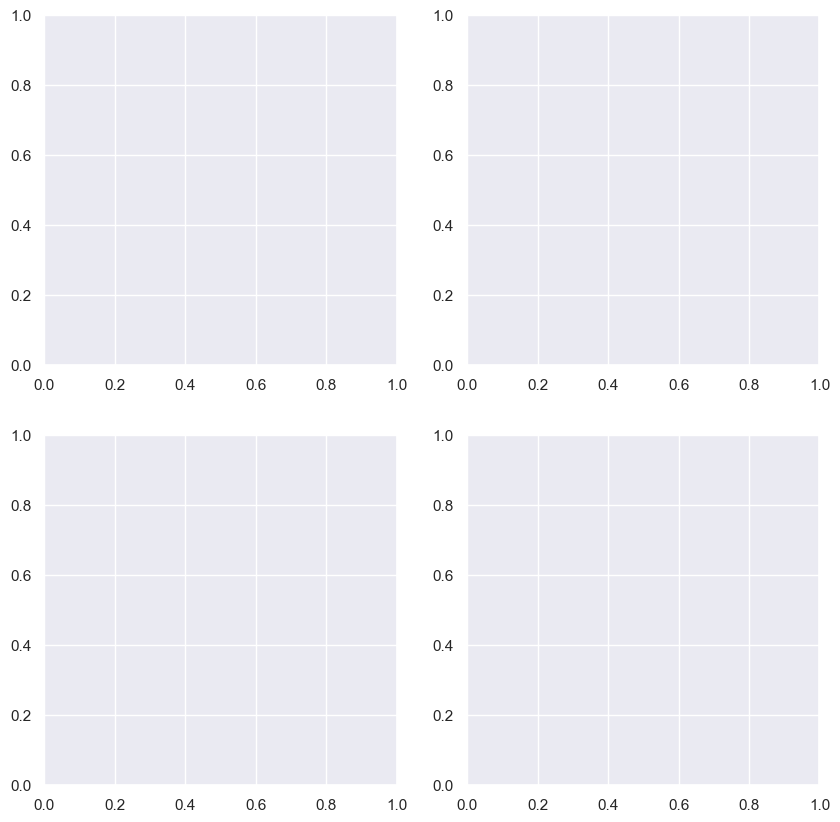

In [21]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme()
fig, axs = plt.subplots(2,2,figsize=(10, 10))




sns.scatterplot(x=[len(i[0]) for i in pos_rev],y=[int(i[1]) for i in pos_rev],ax=axs[0]).set(title="Positive Reviews")
#sns.scatterplot(x=[len(i[0]) for i in neg_rev],y=[int(i[1]) for i in neg_rev],ax=axs[1]).set(title="Negative Reviews")